# On the accuracy of the spectral estimates in pyqg

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
year = 24*60*60*360.
sig = 1.e-8

In [11]:
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=10*year)
m.run()

APEgenspec_orig = m.get_diagnostic('APEgenspec').sum(axis=0)
KEflux_orig = m.get_diagnostic('KEflux').sum(axis=0)
PEflux_orig = m.get_diagnostic('APEflux').sum(axis=0)

t=        72000000, tc=     10000: cfl=0.100333, ke=0.000448215
t=       144000000, tc=     20000: cfl=0.098424, ke=0.000469985
t=       216000000, tc=     30000: cfl=0.097328, ke=0.000470997
t=       288000000, tc=     40000: cfl=0.088779, ke=0.000466301


In [12]:
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=0)
m.run()

APEgenspec_tavestart0 = m.get_diagnostic('APEgenspec').sum(axis=0)
KEflux__tavestart0 = m.get_diagnostic('KEflux').sum(axis=0)
PEflux__tavestart0 = m.get_diagnostic('APEflux').sum(axis=0)

t=        72000000, tc=     10000: cfl=0.093153, ke=0.000504404
t=       144000000, tc=     20000: cfl=0.083890, ke=0.000485885
t=       216000000, tc=     30000: cfl=0.102531, ke=0.000500966
t=       288000000, tc=     40000: cfl=0.091879, ke=0.000475107


In [3]:
# generate 10 random seeds from 0,100
rseed = np.random.randint(low=0,high=100,size=10)

In [6]:
for i in range(rseed.size):
    
    m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=10*year)
    
    rand = np.random.RandomState(seed=rseed[i])
    qi = sig*rand.standard_normal(m.q.shape)
    m.set_q(qi)
    
    m.run()
    
    print " "
    
    if i == 0:
        APEgenspec = m.get_diagnostic('APEgenspec').sum(axis=0)
        KEflux = m.get_diagnostic('KEflux').sum(axis=0)
        PEflux = m.get_diagnostic('APEflux').sum(axis=0)
    else:
        APEgenspec = np.vstack([APEgenspec, m.get_diagnostic('APEgenspec').sum(axis=0)])
        KEflux = np.vstack([KEflux, m.get_diagnostic('KEflux').sum(axis=0)])
        PEflux = np.vstack([PEflux, m.get_diagnostic('APEflux').sum(axis=0)])

t=        72000000, tc=     10000: cfl=0.013090, ke=0.000001118
t=       144000000, tc=     20000: cfl=0.082312, ke=0.000422818
t=       216000000, tc=     30000: cfl=0.113384, ke=0.000504454
t=       288000000, tc=     40000: cfl=0.102772, ke=0.000487053
 
t=        72000000, tc=     10000: cfl=0.012737, ke=0.000001031
t=       144000000, tc=     20000: cfl=0.091448, ke=0.000396300
t=       216000000, tc=     30000: cfl=0.090798, ke=0.000482203
t=       288000000, tc=     40000: cfl=0.096336, ke=0.000477081
 
t=        72000000, tc=     10000: cfl=0.012588, ke=0.000001060
t=       144000000, tc=     20000: cfl=0.076333, ke=0.000457395
t=       216000000, tc=     30000: cfl=0.084377, ke=0.000471589
t=       288000000, tc=     40000: cfl=0.092177, ke=0.000506531
 
t=        72000000, tc=     10000: cfl=0.012501, ke=0.000000811
t=       144000000, tc=     20000: cfl=0.076064, ke=0.000392802
t=       216000000, tc=     30000: cfl=0.101327, ke=0.000465977
t=       288000000, tc=     40000:

(6.2831853071795867e-06, 0.00020106192982974677)

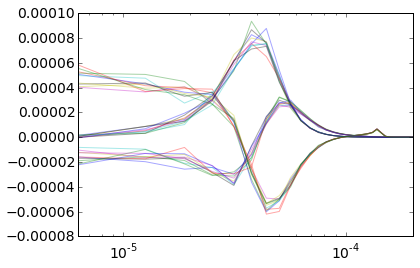

In [23]:
for i in range(rseed.size):
    
    plt.semilogx(m.kk, APEgenspec[i],alpha=.35)
    plt.semilogx(m.kk, PEflux[i],alpha=.35)
    plt.semilogx(m.kk, KEflux[i],alpha=.35)
    
plt.xlim([m.kk.min(), m.kk.max()])
    

(6.2831853071795867e-06, 0.00020106192982974677)

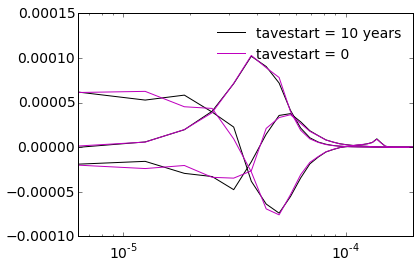

In [28]:
plt.semilogx(m.kk, APEgenspec_orig,'k')
plt.semilogx(m.kk, PEflux_orig,'k')
plt.semilogx(m.kk, KEflux_orig,'k',label='tavestart = 10 years')
    
plt.semilogx(m.kk, APEgenspec_tavestart0,'m')
plt.semilogx(m.kk, PEflux__tavestart0,'m')
plt.semilogx(m.kk, KEflux__tavestart0,'m',label='tavestart = 0')
   
plt.legend()
    
plt.xlim([m.kk.min(), m.kk.max()])
